<h1>PHY 2200 - Computational Physics</h1>
<h1>Spring 2023</h1>

<h3>Enemy Protector Game</h3>

Importing the necessary packages:

In [226]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import math
from IPython.display import clear_output

1.  Standing in a room everyone is told to mentally pick someone in the room that will be their enemy.

2.  Then everyone must pick someone who will be their protector.

3.  The individuals themselves only know these choices.

4.  Once everyone has made their choices, the leader yells, “go!” and everyone must try to keep their protector between themselves and their enemy at all times.

In [227]:
def rk4step(x,t,dxdt,dt,param):
    xn = np.zeros(len(x))
    
    k1 = dt*dxdt(x,t,param)
    k2 = dt*dxdt(x+0.5*k1,t+0.5*dt,param)
    k3 = dt*dxdt(x+0.5*k2,t+0.5*dt,param)
    k4 = dt*dxdt(x+k3,t+dt,param)
    
    for i in range(0,len(x)):
        xn[i] = x[i] + (1.0/6.0)*(k1[i]+2*k2[i]+2*k3[i]+k4[i])
    return xn

In [233]:
def dxdt2(x,t,param):
    (G,m1,m2,m3) = param
    v1x = x[0]
    v1y = x[1]
    v2x = x[2]
    v2y = x[3]
    v3x = x[4]
    v3y = x[5]
    x1 = x[6]
    y1 = x[7]
    x2 = x[8]
    y2 = x[9]
    x3 = x[10]
    y3 = x[11]
    dx1 = v1x
    dy1 = v1y
    dx2 = v2x
    dy2 = v2y
    dx3 = v3x
    dy3 = v3y
    dv1x = (-((G*m1*m2*(x1-x2))/((((x1-x2)**2)+((y1-y2)**2))**(3/2))) - ((G*m1*m3*(x1-x3))/((((x1-x3)**2)+((y1-y3)**2))**(3/2))))/m1
    dv1y = (-((G*m1*m2*(y1-y2))/((((x1-x2)**2)+((y1-y2)**2))**(3/2))) - ((G*m1*m3*(y1-y3))/((((x1-x3)**2)+((y1-y3)**2))**(3/2))))/m1
    dv2x = (-((G*m1*m2*(x2-x1))/((((x2-x1)**2)+((y2-y1)**2))**(3/2))) - ((G*m2*m3*(x2-x3))/((((x2-x3)**2)+((y2-y3)**2))**(3/2))))/m2  
    dv2y = (-((G*m1*m2*(y2-y1))/((((x2-x1)**2)+((y2-y1)**2))**(3/2))) - ((G*m2*m3*(y2-y3))/((((x2-x3)**2)+((y2-y3)**2))**(3/2))))/m2
    dv3x = (-((G*m1*m3*(x3-x1))/((((x3-x1)**2)+((y3-y1)**2))**(3/2))) - ((G*m2*m3*(x3-x2))/((((x3-x2)**2)+((y2-y3)**2))**(3/2))))/m3
    dv3y = (-((G*m1*m3*(y3-y1))/((((x3-x1)**2)+((y3-y1)**2))**(3/2))) - ((G*m3*m2*(y3-y2))/((((x3-x2)**2)+((y3-y2)**2))**(3/2))))/m3  
    return np.array([dv1x,dv1y,dv2x,dv2y,dv3x,dv3y,dx1,dy1,dx2,dy2,dx3,dy3])
tmax = 1
N = 10000
t = np.linspace(0,tmax,N)
dt = t[1]-t[0]
v1x = np.zeros(N)
v1y = np.zeros(N)
v2x = np.zeros(N)
v2y = np.zeros(N)
v3x = np.zeros(N)
v3y = np.zeros(N)
x1 = np.zeros(N)
y1 = np.zeros(N)
x2 = np.zeros(N)
y2 = np.zeros(N)
x3 = np.zeros(N)
y3 = np.zeros(N)

G=1
m1 = 100
m2 = 1
m3 = .75
v1x[0] = 0
v1y[0] = 0
v2x[0] = 0
v3x[0] = 0
x1[0] = 0
y1[0] = 0
x2[0] = 1
y2[0] = 0
x3[0] = 1.5
y3[0] = 0
v20 = ((G*m1)/x2[0])**(1/2)
v2y[0] = v20
v30 = ((G*m1)/x3[0])**(1/2)
v3y[0] = v30
param = (G,m1,m2,m3)

for i in range(0,N-1):
    L = rk4step([v1x[i],v1y[i],v2x[i],v2y[i],v3x[i],v3y[i],x1[i],y1[i],x2[i],y2[i],x3[i],y3[i]],t,dxdt2,dt,param)
    v1x[i+1] = L[0]
    v1y[i+1] = L[1]
    v2x[i+1] = L[2]
    v2y[i+1] = L[3]
    v3x[i+1] = L[4]
    v3y[i+1] = L[5]
    x1[i+1] = L[6]
    y1[i+1] = L[7]
    x2[i+1] = L[8]
    y2[i+1] = L[9]
    x3[i+1] = L[10]
    y3[i+1] = L[11]  

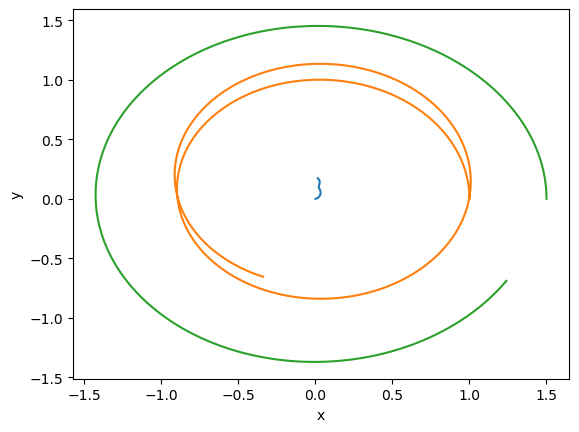

In [234]:
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

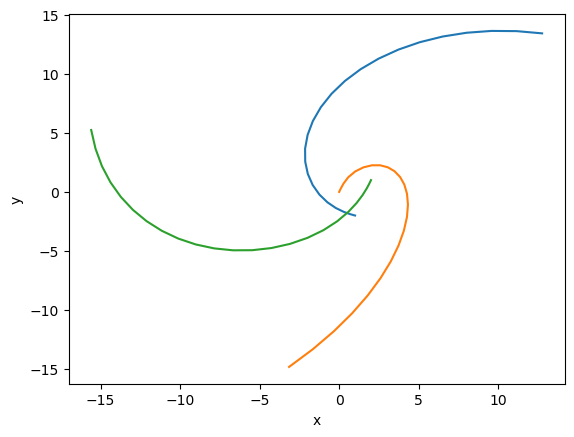

In [243]:
def dxdt(x,t,param):
    (Ep,m1,m2,m3) = param
    v1x = x[0]
    v1y = x[1]
    v2x = x[2]
    v2y = x[3]
    v3x = x[4]
    v3y = x[5]
    x1 = x[6]
    y1 = x[7]
    x2 = x[8]
    y2 = x[9]
    x3 = x[10]
    y3 = x[11]
    dx1 = v1x
    dy1 = v1y
    dx2 = v2x
    dy2 = v2y
    dx3 = v3x
    dy3 = v3y
    dx=x2-x3
    dy=y2-y3
    dz=1/(((dx**2)+(dy**2))**(1/2))
    vx=dx-x1
    vy=dy-y1
    vz=1/(((vx**2)+(vy**2))**(1/2))
    dv1x = vz*vx
    dv1y = vz*vy
    dx=x3-x1
    dy=y3-y1
    dz=1/(((dx**2)+(dy**2))**(1/2))
    vx=dx-x2
    vy=dy-y2
    vz=1/(((vx**2)+(vy**2))**(1/2))
    dv2x = vz*vx  #* 0
    dv2y = vz*vy  #* 0
    dx=x1-x2
    dy=y1-y2
    dz=1/(((dx**2)+(dy**2))**(1/2))
    vx=dx-x3
    vy=dy-y3
    vz=1/(((vx**2)+(vy**2))**(1/2))
    dv3x = vz*vx  #* 0
    dv3y = vz*vy  #* 0 
    return np.array([dv1x,dv1y,dv2x,dv2y,dv3x,dv3y,dx1,dy1,dx2,dy2,dx3,dy3])

tmax = 10
N = 25
t = np.linspace(0,tmax,N)
dt = t[1]-t[0]
v1x = np.zeros(N)
v1y = np.zeros(N)
v2x = np.zeros(N)
v2y = np.zeros(N)
v3x = np.zeros(N)
v3y = np.zeros(N)
x1 = np.zeros(N)
y1 = np.zeros(N)
x2 = np.zeros(N)
y2 = np.zeros(N)
x3 = np.zeros(N)
y3 = np.zeros(N)

G=1
m1 = 1
m2 = 1
m3 = 1
v1x[0] = 0
v1y[0] = 0
v2x[0] = 0
v3x[0] = 0
x1[0] = 1
y1[0] = -2
x2[0] = 0
y2[0] = 0
x3[0] = 2
y3[0] = 1
#v20 = ((G*m1)/x2[0])**(1/2)
v2y[0] = 0
#v30 = ((G*m1)/x3[0])**(1/2)
v3y[0] = 0
param = (Ep,m1,m2,m3)

for i in range(0,N-1):
    L = rk4step([v1x[i],v1y[i],v2x[i],v2y[i],v3x[i],v3y[i],x1[i],y1[i],x2[i],y2[i],x3[i],y3[i]],t,dxdt,dt,param)
    v1x[i+1] = L[0]
    v1y[i+1] = L[1]
    v2x[i+1] = L[2]
    v2y[i+1] = L[3]
    v3x[i+1] = L[4]
    v3y[i+1] = L[5]
    x1[i+1] = L[6]
    y1[i+1] = L[7]
    x2[i+1] = L[8]
    y2[i+1] = L[9]
    x3[i+1] = L[10]
    y3[i+1] = L[11] 

plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

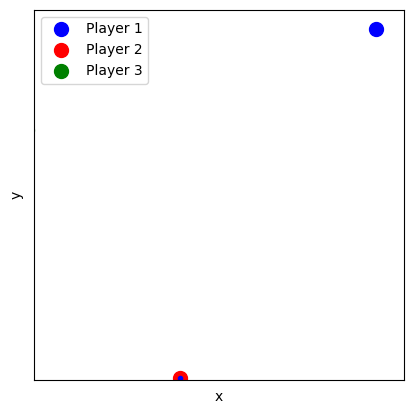

In [244]:

for j in range(0, N,1):
    fig, ax = plt.subplots()
    ax.set_xlim([-15, 15])
    ax.set_ylim([-15, 15])
    ax.set_aspect('equal')
    plt.xticks([])
    plt.yticks([])
    pos = np.array([[x1[j], y1[j]], [x2[j], y2[j]], [x3[j], y3[j]]])
    lines = ax.plot(pos[0, 0], pos[0, 1], color='blue', marker='o', linestyle='', markersize=10)
    lines += ax.plot(pos[1, 0], pos[1, 1], color='red', marker='o', linestyle='', markersize=10)
    lines += ax.plot(pos[2, 0], pos[2, 1], color='green', marker='o', linestyle='', markersize=10)
    ax.legend(lines, ['Player 1', 'Player 2', 'Player 3'])
    plt.plot(x1[j],y1[j],'b.')
    plt.plot(x2[j],y2[j],'b.')
    plt.plot(x3[j],y3[j],'b.')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show() 
    time.sleep(.5)
    clear_output(wait=True)

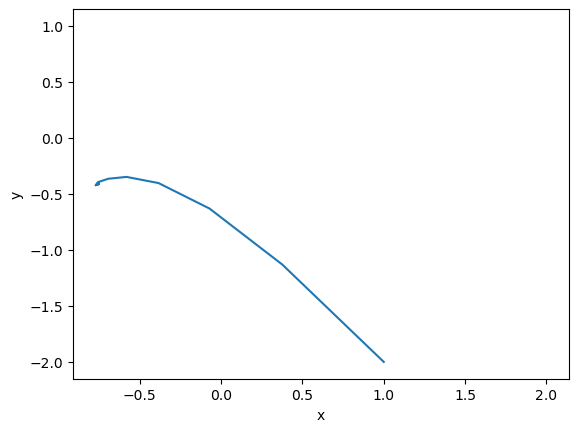

In [245]:
def rk4step(x,t,dxdt,dt,param):
    xn = np.zeros(len(x))
    
    k1 = dt*dxdt(x,t,param)
    k2 = dt*dxdt(x+0.5*k1,t+0.5*dt,param)
    k3 = dt*dxdt(x+0.5*k2,t+0.5*dt,param)
    k4 = dt*dxdt(x+k3,t+dt,param)
    
    for i in range(0,len(x)):
        xn[i] = x[i] + (1.0/6.0)*(k1[i]+2*k2[i]+2*k3[i]+k4[i])
    return xn


def dxdt(x,t,param):
    (Ep,m1,m2,m3) = param

    x1 = x[6]
    y1 = x[7]
    x2 = x[8]
    y2 = x[9]
    x3 = x[10]
    y3 = x[11]
    dx=x2-x3
    dy=y2-y3
    dz=1/(((dx**2)+(dy**2))**(1/2))
    hx = x2+(dz*dx)
    hy = y2+(dz*dy)
    vx=hx-x1
    vy=hy-y1
    vz=1/(((vx**2)+(vy**2))**(1/2))
    dv1x = vz*vx
    dv1y = vz*vy
    dx=x3-x1
    dy=y3-y1
    dz=1/(((dx**2)+(dy**2))**(1/2))
    hx = x3+(dz*dx)
    hy = y3+(dz*dy)
    vx=hx-x2
    vy=hy-y2
    vz=1/(((vx**2)+(vy**2))**(1/2))
    dv2x = vz*vx  * 0
    dv2y = vz*vy  * 0
    dx=x1-x2
    dy=y1-y2
    dz=1/(((dx**2)+(dy**2))**(1/2))
    hx = x1+(dz*dx)
    hy = y1+(dz*dy)
    vx=hx-x3
    vy=hy-y3
    vz=1/(((vx**2)+(vy**2))**(1/2))
    dv3x = vz*vx  * 0
    dv3y = vz*vy  * 0 
    dx1= dv1x - x1
    dy1= dv1y - y1
    dx2= 0#dv2x - x2
    dy2= 0#dv2y - y2
    dx3= 0#dv3x - x3
    dy3= 0#dv3y - y3
    return np.array([dv1x,dv1y,dv2x,dv2y,dv3x,dv3y,dx1,dy1,dx2,dy2,dx3,dy3])

tmax = 10
N = 25
t = np.linspace(0,tmax,N)
dt = t[1]-t[0]
v1x = np.zeros(N)
v1y = np.zeros(N)
v2x = np.zeros(N)
v2y = np.zeros(N)
v3x = np.zeros(N)
v3y = np.zeros(N)
x1 = np.zeros(N)
y1 = np.zeros(N)
x2 = np.zeros(N)
y2 = np.zeros(N)
x3 = np.zeros(N)
y3 = np.zeros(N)

G=1
m1 = 1
m2 = 1
m3 = 1
v1x[0] = 0
v1y[0] = 0
v2x[0] = 0
v3x[0] = 0
x1[0] = 1
y1[0] = -2
x2[0] = 0
y2[0] = 0
x3[0] = 2
y3[0] = 1
#v20 = ((G*m1)/x2[0])**(1/2)
v2y[0] = 0
#v30 = ((G*m1)/x3[0])**(1/2)
v3y[0] = 0
param = (Ep,m1,m2,m3)

for i in range(0,N-1):
    L = rk4step([v1x[i],v1y[i],v2x[i],v2y[i],v3x[i],v3y[i],x1[i],y1[i],x2[i],y2[i],x3[i],y3[i]],t,dxdt,dt,param)
    v1x[i+1] = L[0]
    v1y[i+1] = L[1]
    v2x[i+1] = L[2]
    v2y[i+1] = L[3]
    v3x[i+1] = L[4]
    v3y[i+1] = L[5]
    x1[i+1] = L[6]
    y1[i+1] = L[7]
    x2[i+1] = L[8]
    y2[i+1] = L[9]
    x3[i+1] = L[10]
    y3[i+1] = L[11] 

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

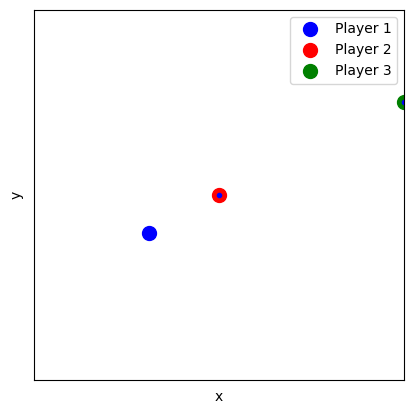

KeyboardInterrupt: 

In [248]:
for j in range(0, N,1):
    fig, ax = plt.subplots()
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_aspect('equal')
    plt.xticks([])
    plt.yticks([])
    pos = np.array([[x1[j], y1[j]], [x2[j], y2[j]], [x3[j], y3[j]]])
    lines = ax.plot(pos[0, 0], pos[0, 1], color='blue', marker='o', linestyle='', markersize=10)
    lines += ax.plot(pos[1, 0], pos[1, 1], color='red', marker='o', linestyle='', markersize=10)
    lines += ax.plot(pos[2, 0], pos[2, 1], color='green', marker='o', linestyle='', markersize=10)
    ax.legend(lines, ['Player 1', 'Player 2', 'Player 3'])
    plt.plot(x1[j],y1[j],'b.')
    plt.plot(x2[j],y2[j],'b.')
    plt.plot(x3[j],y3[j],'b.')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show() 
    time.sleep(.5)
    clear_output(wait=True)

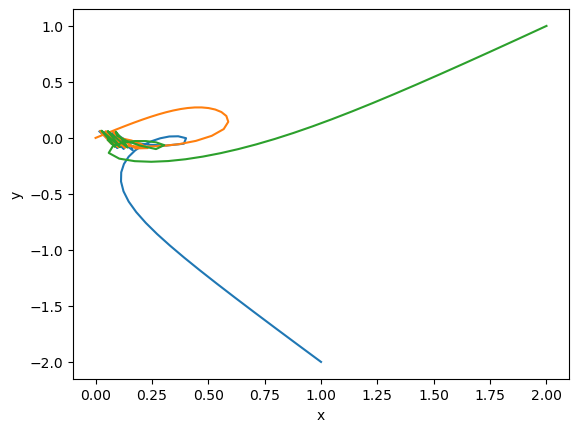

In [249]:
def rk4step(x,t,dxdt,dt,param):
    xn = np.zeros(len(x))
    
    k1 = dt*dxdt(x,t,param)
    k2 = dt*dxdt(x+0.5*k1,t+0.5*dt,param)
    k3 = dt*dxdt(x+0.5*k2,t+0.5*dt,param)
    k4 = dt*dxdt(x+k3,t+dt,param)
    
    for i in range(0,len(x)):
        xn[i] = x[i] + (1.0/6.0)*(k1[i]+2*k2[i]+2*k3[i]+k4[i])
    return xn


def dxdt(x,t,param):
    (Ep,m1,m2,m3) = param

    x1 = x[6]
    y1 = x[7]
    x2 = x[8]
    y2 = x[9]
    x3 = x[10]
    y3 = x[11]
    dx=x2-x3
    dy=y2-y3
    dz=1/(((dx**2)+(dy**2))**(1/2))
    hx = x2+(dz*dx)
    hy = y2+(dz*dy)
    vx=hx-x1
    vy=hy-y1
    vz=1/(((vx**2)+(vy**2))**(1/2))
    dv1x = vz*vx
    dv1y = vz*vy
    dx=x3-x1
    dy=y3-y1
    dz=1/(((dx**2)+(dy**2))**(1/2))
    hx = x3+(dz*dx)
    hy = y3+(dz*dy)
    vx=hx-x2
    vy=hy-y2
    vz=1/(((vx**2)+(vy**2))**(1/2))
    dv2x = vz*vx  
    dv2y = vz*vy 
    dx=x1-x2
    dy=y1-y2
    dz=1/(((dx**2)+(dy**2))**(1/2))
    hx = x1+(dz*dx)
    hy = y1+(dz*dy)
    vx=hx-x3
    vy=hy-y3
    vz=1/(((vx**2)+(vy**2))**(1/2))
    dv3x = vz*vx 
    dv3y = vz*vy  
    dx1= dv1x - x1
    dy1= dv1y - y1
    dx2= dv2x - x2
    dy2= dv2y - y2
    dx3= dv3x - x3
    dy3= dv3y - y3
    return np.array([dv1x,dv1y,dv2x,dv2y,dv3x,dv3y,dx1,dy1,dx2,dy2,dx3,dy3])

tmax = 3
N = 50
t = np.linspace(0,tmax,N)
dt = t[1]-t[0]
v1x = np.zeros(N)
v1y = np.zeros(N)
v2x = np.zeros(N)
v2y = np.zeros(N)
v3x = np.zeros(N)
v3y = np.zeros(N)
x1 = np.zeros(N)
y1 = np.zeros(N)
x2 = np.zeros(N)
y2 = np.zeros(N)
x3 = np.zeros(N)
y3 = np.zeros(N)

G=1
m1 = 1
m2 = 1
m3 = 1
v1x[0] = 0
v1y[0] = 0
v2x[0] = 0
v3x[0] = 0
x1[0] = 1
y1[0] = -2
x2[0] = 0
y2[0] = 0
x3[0] = 2
y3[0] = 1
#v20 = ((G*m1)/x2[0])**(1/2)
v2y[0] = 0
#v30 = ((G*m1)/x3[0])**(1/2)
v3y[0] = 0
param = (Ep,m1,m2,m3)

for i in range(0,N-1):
    L = rk4step([v1x[i],v1y[i],v2x[i],v2y[i],v3x[i],v3y[i],x1[i],y1[i],x2[i],y2[i],x3[i],y3[i]],t,dxdt,dt,param)
    v1x[i+1] = L[0]
    v1y[i+1] = L[1]
    v2x[i+1] = L[2]
    v2y[i+1] = L[3]
    v3x[i+1] = L[4]
    v3y[i+1] = L[5]
    x1[i+1] = L[6]
    y1[i+1] = L[7]
    x2[i+1] = L[8]
    y2[i+1] = L[9]
    x3[i+1] = L[10]
    y3[i+1] = L[11] 

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

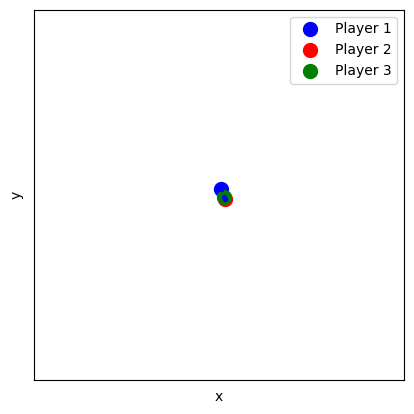

In [251]:
for j in range(0, N,1):
    fig, ax = plt.subplots()
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_aspect('equal')
    plt.xticks([])
    plt.yticks([])
    pos = np.array([[x1[j], y1[j]], [x2[j], y2[j]], [x3[j], y3[j]]])
    lines = ax.plot(pos[0, 0], pos[0, 1], color='blue', marker='o', linestyle='', markersize=10)
    lines += ax.plot(pos[1, 0], pos[1, 1], color='red', marker='o', linestyle='', markersize=10)
    lines += ax.plot(pos[2, 0], pos[2, 1], color='green', marker='o', linestyle='', markersize=10)
    ax.legend(lines, ['Player 1', 'Player 2', 'Player 3'])
    plt.plot(x1[j],y1[j],'b.')
    plt.plot(x2[j],y2[j],'b.')
    plt.plot(x3[j],y3[j],'b.')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show() 
    time.sleep(.5)
    clear_output(wait=True)